<Body>   
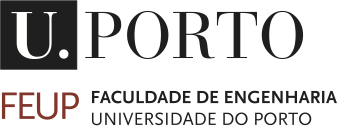   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** both the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 18** in your corresponding practical class. Upload the files until 23:59 of **March 27, 2024**.


---



In [14]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
#!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

# **Identification**

* **Group:** Project_A01_A
* **Name:** Sename Grégoire
* **Student Number:** up202311020

* **Name:** Tancredi Matteo
* **Student Number:**  up202311682


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [15]:
# !wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
# !unzip dataset.csv.zip -d.

In [16]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head()
df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!

### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as



\begin{align}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &=
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align}


\begin{align}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &=
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1**
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
from numpy.linalg import inv
from numpy.linalg import det
from numpy import array
from numpy import diag
import random
random.seed(3)

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values

time_vect = [time[i] for i in range(0, len(time), 5)]

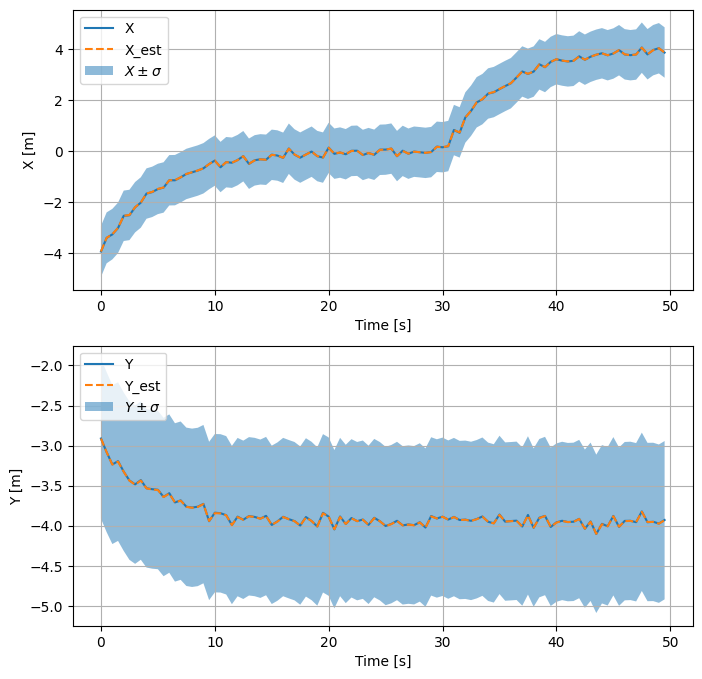

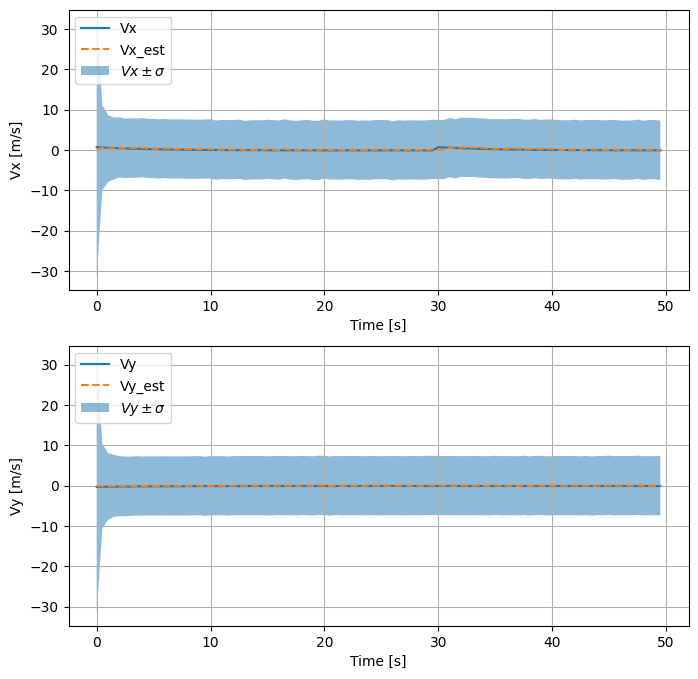

In [18]:
def kf_predict(X, P, A, Q, B, U):
    """
      X : The mean state estimate of the previous step (k−1) - shape(m,1)
      P : The state covariance of previous step (k−1) - shape(m,m)
      A : The transition  matrix - shape(m,m)
      Q : The process noise covariance matrix - shape(m,m)
      B : The input effect matrix - shape(p, m)
      U : The control input - shape(q,1)
    """
    X = A @ X+B @ U
    P = A @ P @ A.T+Q
    return(X,P)


def kf_update(X, P, Y, H, R):
    """
      K  : the Kalman Gain matrix
      IS : the Covariance or predictive mean of Y
    """
    IS = H @ P @ H.T + R
    K = P @ H.T @ inv(IS)
    X = X + K @ (Y-H @ X)
    P = P - K @ IS @ K.T
    return (X,P)

#
# Kalman Filter loop
#

#initial values X:

h = 0.1

# init state
X = np.array( [[ x[0]] , [0.0]]  )

# ini Covar
Px = np.array( [ [ 999.0, 0.0 ] ,
               [ 0.0, 999.0 ] ]  )    

# state matrix
Ax = np.array( [ [ 1.0, h ] ,
                [ 0.0, 1.0  ] ] )

# input effect matrix
Bx = np.array( [ [h], [0] ] )

# ini input
Ux = np.array( [vx[0]] )

# process noise
Qx = np.array(np.eye(2) * 5 )
# values

# meas matrix
Hx = np.array( [ [ 1.0, 0.0 ] ] )

# meas
Zx = np.array([ x[0] ])  

# meas noise
Rx = np.array([ [1.0] ] )


# initial values Y:

# ini state
Y = np.array( [ [y[0]] , [0.0]]  )

# ini Covar
Py = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  )    

# state matrix
Ay = np.array( [ [ 1.0, h ] ,
                [ 0.0, 1.0  ] ] )

# input effect matrix
By = np.array( [ [h], [0] ] )

# ini input
Uy = np.array( [vy[0]] )

# process noise
Qy = np.array(np.eye(2) * 5 )
# values

# meas matrix
Hy = np.array( [ [ 1.0, 0.0 ] ] )

# meas
Zy = np.array([ y[0] ])  

# meas noise
Ry = np.array([ [1.0] ] ) 

N_iter = len(time)  



X_position = []       #X mean
Y_position = []       #Y mean
X_position_up = []     #X mean + stddev
X_position_down = []  #X mean - stddev
Y_position_up = []     #Y mean + stddev
Y_position_down = []  #Y mean - stddev

Vx = [] # X velocity
Vy = [] # Y velocity

Vxmin = [] # X velocity - stddev
Vxmax = [] # X velocity + stddev

Vymax = [] # Y velocity + stddev
Vymin = [] # Y velocity - stddev

for t in range(0, N_iter):

  # X values
  Ux = np.array( [vx[t]] )
  Zx = np.array([ x[t] ])

  (X, Px) = kf_predict(X, Px, Ax, Qx, Bx, Ux)

  # Y values
  Uy = np.array( [vy[t]] )
  Zy = np.array([ y[t] ])

  (Y, Py) = kf_predict(Y, Py, Ay, Qy, By, Uy)

    
  if t%5 ==0:
    # X values update
    (X, Px) = kf_update(X, Px, Zx, Hx, Rx)

    X_position.append(X[0][0].item())
    X_position_up.append(X[0][0].item() + sqrt( Px[0][0]).item() )
    X_position_down.append(X[0][0].item() - sqrt( Px[0][0]).item())
    Vx.append(X[1][0].item())
    Vxmin.append(X[1][0].item() - sqrt( Px[1][1]).item())
    Vxmax.append(X[1][0].item() + sqrt( Px[1][1]).item())    
    
    # Y values update
    (Y, Py) = kf_update(Y, Py, Zy, Hy, Ry)

    Y_position.append(Y[0][0].item())
    Y_position_up.append(Y[0][0].item() + sqrt( Py[0][0]).item() )
    Y_position_down.append(Y[0][0].item() - sqrt( Py[0][0]).item())
    Vy.append(Y[1][0].item())
    Vymax.append(Y[1][0].item() + sqrt( Py[1][1]).item())
    Vymin.append(Y[1][0].item() - sqrt( Py[1][1]).item())
      

# Plotting the results@
x_show = [x[i] for i in range(N_iter) if i%5 == 0]
y_show = [y[i] for i in range(N_iter) if i%5 == 0]

fig = plt.figure(figsize=(8,8))
chart1 = fig.add_subplot(211)
chart1.plot(time_vect, x_show, label='X')
chart1.plot(time_vect, X_position, '--', label='X_est')
chart1.fill_between(time_vect, X_position_down, X_position_up, label='$X\pm\sigma$', alpha=0.5)
chart1.set_ylabel('X [m]')
chart1.set_xlabel('Time [s]')
plt.legend(loc='upper left')
plt.grid()

chart2 = fig.add_subplot(212)
chart2.plot(time_vect, y_show, label='Y')
chart2.plot(time_vect, Y_position, '--', label='Y_est')
chart2.fill_between(time_vect, Y_position_down, Y_position_up, label='$Y\pm\sigma$', alpha=0.5)
chart2.set_ylabel('Y [m]')
chart2.set_xlabel('Time [s]')
plt.legend(loc='upper left')
plt.grid()

vx_show = [vx[i] for i in range(N_iter) if i%5 == 0]
vy_show = [vy[i] for i in range(N_iter) if i%5 == 0]

fig2 = plt.figure(figsize=(8,8))
chart3 = fig2.add_subplot(211)
chart3.plot(time_vect, vx_show, label='Vx')
chart3.plot(time_vect, Vx, '--', label='Vx_est')
chart3.fill_between(time_vect, Vxmin, Vxmax, label='$Vx\pm\sigma$', alpha=0.5)
chart3.set_ylabel('Vx [m/s]')
chart3.set_xlabel('Time [s]')
plt.legend(loc='upper left')
plt.grid()

chart4 = fig2.add_subplot(212)
chart4.plot(time_vect, vy_show, label='Vy')
chart4.plot(time_vect, Vy, '--', label='Vy_est')
chart4.fill_between(time_vect, Vymin, Vymax, label='$Vy\pm\sigma$', alpha=0.5)
chart4.set_ylabel('Vy [m/s]')
chart4.set_xlabel('Time [s]')
plt.legend(loc='upper left')
plt.grid()

plt.show()

In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

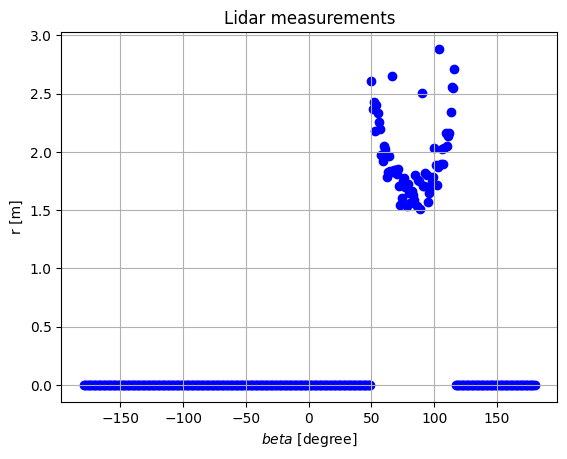

In [19]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data,
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x }
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



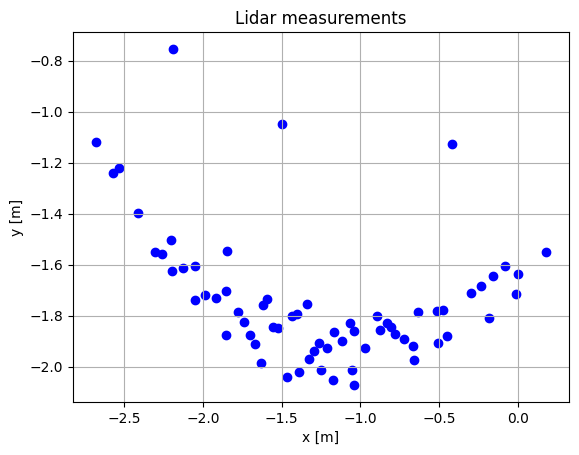

In [20]:
# Part 2.1.1

#Build the cloud points in 2D plan
x_o, y_o = [], []
t=5*10 # t = 5 sec * 1/sample_time

for i in range(len(Lidar_range[t])):
    if Lidar_range[t][i] > 0:
        x_o.append(Lidar_range[t][i]*np.cos(np.radians(angle[i])) + x[t])
        y_o.append(Lidar_range[t][i]*np.sin(np.radians(angle[i])) + y[t])

plt.figure()
plt.scatter(x_o, y_o, color='b')
plt.title('Lidar measurements')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.grid();


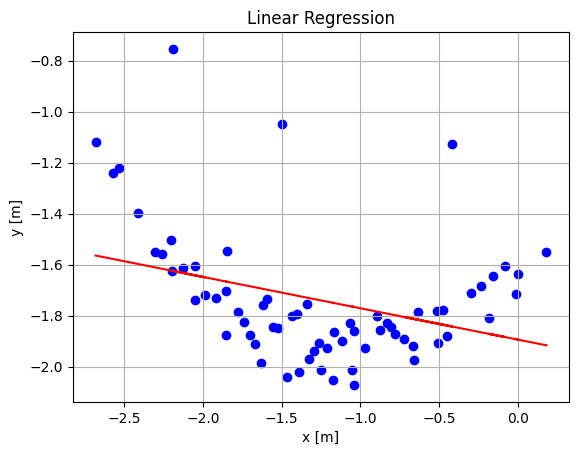

In [21]:
# Part 2.1.2

# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

 # Calculate Cross covariance between x and y (covariance without dividing by n-1)
def crosscovariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

# Calculate the variance of a list of numbers (not dividing by n-1)
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

def coefficients(x,y):
	x_mean, y_mean = mean(x), mean(y)
	m = crosscovariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b = y_mean - m * x_mean
	return [b, m]


b, m =  coefficients(x_o, y_o)

# Plot outputs
plt.figure()
plt.scatter(x_o, y_o, color='blue')
plt.plot(x_o, [m*x+b for x in x_o], color='red')
plt.title('Linear Regression')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.grid();





**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 }
 \end{equation}



Parameters theta =
 [-1.5859663   0.59987928  0.28829671]


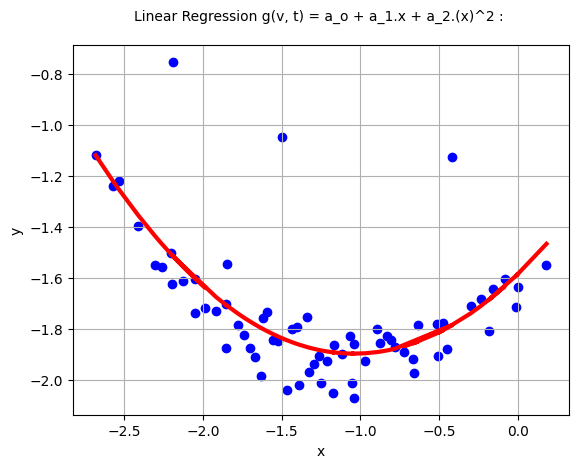

In [22]:
# Part 2.2.2

#Create X matrix with ones: g(v, t) = a_o + a_1.x + a_2.(x)^2
X = np.array([np.ones(len(x_o)), x_o, np.power(x_o, 2)]).T

#Create Y matrix
Y = np.array(y_o)

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Parameters theta =\n", theta)

# Precticted values
Y_predict = X @ theta

### Plot
plt.scatter(x_o, y_o, color='blue')
plt.plot(x_o, Y_predict,  color="red", linewidth=3)
plt.grid()

plt.title("Linear Regression g(v, t) = a_o + a_1.x + a_2.(x)^2 : \n " ,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()




**2.3**
At this point you can use sklearn!
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




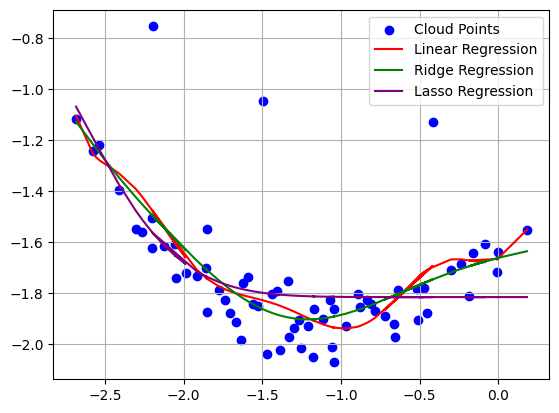

Mean Squared Error (LASSO Regression): 0.03788988560971358
Mean Squared Error (Ridge Regression): 0.031362076752602025
Mean Squared Error (Polynomial Regression): 0.03017819698676999


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

X = np.array(x_o).reshape(-1, 1)
y = np.array(y_o)


poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)

poly_model_10 = LinearRegression()
poly_model_10.fit(X_poly, y)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y)

lasso_model = Lasso(alpha=1.0, tol=0.01)
lasso_model.fit(X_poly, y)

y_pred_poly_10 = poly_model_10.predict(X_poly)
y_pred_ridge = ridge_model.predict(X_poly)
y_pred_lasso = lasso_model.predict(X_poly)


mse_poly_10 = mean_squared_error(y, y_pred_poly_10)
mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

plt.figure()
plt.scatter(x_o, y_o, color='b', label='Cloud Points')
plt.grid()

# Plotting the predictions from the linear regression model
plt.plot(X[:, 0], y_pred_poly_10, color='red', label='Linear Regression')

# Plotting the predictions from the Ridge model
plt.plot(X[:, 0], y_pred_ridge, color='green', label='Ridge Regression')

# Plotting the predictions from the Lasso model
plt.plot(X[:, 0], y_pred_lasso, color='purple', label='Lasso Regression')

plt.legend()
plt.show()

print("Mean Squared Error (LASSO Regression):", mse_lasso)
print("Mean Squared Error (Ridge Regression):", mse_ridge)
print("Mean Squared Error (Polynomial Regression):", mse_poly_10)



# **Part 2: Linear Regression**



### Conclusion on the Lasso, Ridge and Polynomial regression

**2.3** The Ridge model seems to be the best one, as it has a good balance between the two previous models. The Polynomial model with degree 10 seems to be the best one, as it has the lowest MSE. However, it is important to note that the Polynomial model with degree 10 has a high degree of overfitting, which can be a problem in real-world applications. The Lasso model has the highest MSE, which indicates that it is not a good model for this dataset. The Ridge model has a lower MSE than the Lasso model, but it is still higher than the Polynomial model with degree 10. Therefore, the Polynomial model with degree 10 seems to be the best model for this dataset, despite its high degree of overfitting.



**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for
$\color{green} \theta$.


Coefficients Linear: 
 [   0.           -3.12499087    4.83337367   87.89275596  198.18636923
  121.76536675  -93.44209194 -170.68369607  -95.15094403  -23.9564878
   -2.31491824]
Coefficients Ridge: 
 [ 0.         -0.33207303  0.1305686   0.30403373 -0.60118521  0.53376671
 -0.07483855 -0.41624555  0.31064821  0.31662095  0.06046062]
Coefficients Lasso: 
 [ 0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.00421506 -0.         -0.00044464]


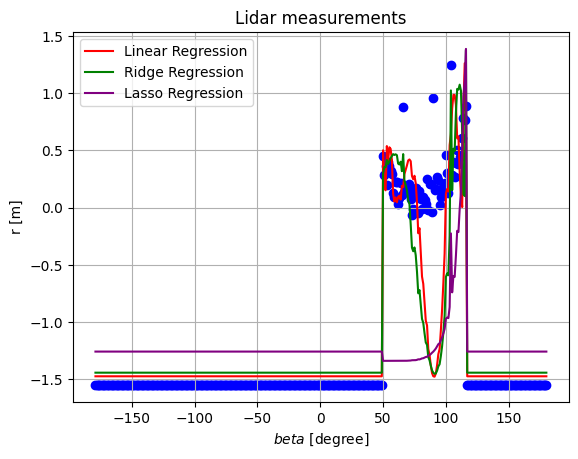

In [24]:
# Part 2.2.4


time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

#Build the cloud points in 2D plan
x_o, y_o = [], []
t=5*10 # t = 5 sec * 1/sample_time

for i in range(len(Lidar_range[t])):
      # if Lidar_range[t][i] > 0:
      x_o.append(Lidar_range[t][i]*np.cos(np.radians(angle[i])) + x[t])
      y_o.append(Lidar_range[t][i]*np.sin(np.radians(angle[i])) + y[t])



X = np.array(x_o).reshape(-1, 1)
Y = np.array(y_o)


poly_features = PolynomialFeatures(degree=10)
X = poly_features.fit_transform(X)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
y_pred = regr.predict(X)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, Y)

# Make predictions using the testing set
y_pred_ridge = ridge_model.predict(X)

lasso_model = Lasso(alpha=1.0, tol=0.1)
lasso_model.fit(X, Y)

# Make predictions using the testing set
y_pred_lasso = lasso_model.predict(X)


# The coefficients
print('Coefficients Linear: \n', regr.coef_)
print('Coefficients Ridge: \n', ridge_model.coef_)
print('Coefficients Lasso: \n', lasso_model.coef_)

# The mean squared error


plt.figure()
plt.scatter(angle, y_o, color='b')

# Plotting the predictions from the linear regression model
plt.plot(angle, y_pred, color='red', label='Linear Regression')

# Plotting the predictions from the Ridge model
plt.plot(angle, y_pred_ridge, color='green', label='Ridge Regression')

# Plotting the predictions from the Lasso model
plt.plot(angle, y_pred_lasso, color='purple', label='Lasso Regression')

plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()
plt.legend()
plt.show()

**2.5 (Extra)**
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

## Strategy to make the linear regression on-line

1. Find the optimal value for $\color{green} \gamma$ by mesuring the loss function for different values of $\color{green} \gamma$.
2. Implement the gradient descent rule to update the optimal value $\color{green} \theta$.

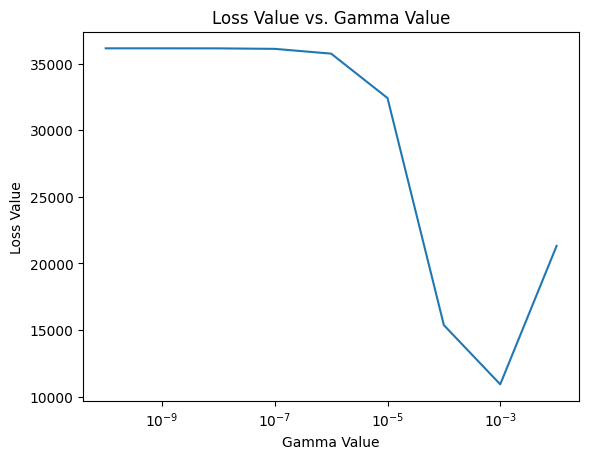

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Perform gradient descent for each snapshot (every 5th row)
def gradient_descent(theta, x_lid, y_lid, gamma):
    for t in range(num_snapshots//5):    

        # Get the gradient value at time - t * 5
        gradient = 0
        for i in range(len(x_lid[t])):
            gradient += (y_lid[t][i] - theta[-1] * x_lid[t][i]) * x_lid[t][i]
        
        gradients.append(gradient)
        # get the new theta value
        theta.append(theta[-1] + gamma * gradient)
    return theta

x = df["x"].values
y = df["y"].values


# Number of snapshots (assuming every row is a snapshot)
num_snapshots = len(time)

# Initialize the parameters theta with zeros
gradients = []

x_lid, y_lid = [], []

for t in range(num_snapshots):
    if t % 5 == 0:
        x_t, y_t = [], []
        for i in range(len(Lidar_range[t])):
            if Lidar_range[t][i] > 0:
                x_t.append(Lidar_range[t][i]*np.cos(np.radians(angle[i])) + x[t])
                y_t.append(Lidar_range[t][i]*np.sin(np.radians(angle[i])) + y[t])
        x_lid.append(x_t)
        y_lid.append(y_t)

theta = [y_lid[0][0] / x_lid[0][0]]

gamma_vals = [10**i for i in range(-10,-1, 1)]
loss_vals = []
for gam in gamma_vals:
    theta = gradient_descent(theta, x_lid, y_lid, gam)
    loss = 0
    for t in range(num_snapshots//5):
        for i in range(len(x_lid[t])):
            loss += (y_lid[t][i] - theta[-1] * x_lid[t][i])**2
    loss_vals.append(loss)

plt.figure()
plt.plot(gamma_vals, loss_vals)
plt.xscale('log')
plt.xlabel('Gamma Value')
plt.ylabel('Loss Value')
plt.title('Loss Value vs. Gamma Value')
plt.show()





As we can see, the optimal value for $\color{green} \gamma$ is 0.001. Therefore, we can use this value to implement the gradient descent rule to update the optimal value $\color{green} \theta$.

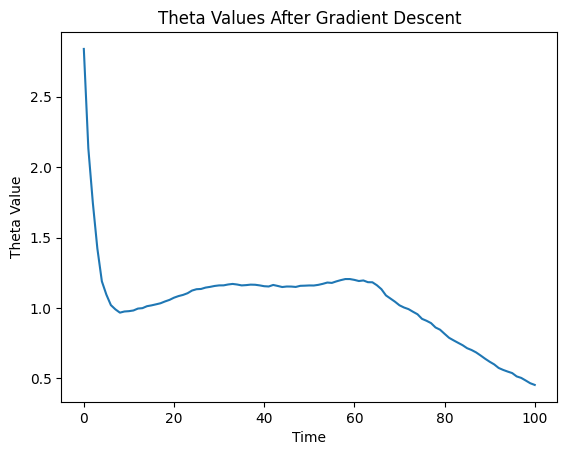

In [26]:
theta = [y_lid[0][0] / x_lid[0][0]]
# Define the learning rate
gamma = 0.001

theta = gradient_descent(theta, x_lid, y_lid, gamma)
# Plot the results
plt.figure()
plt.plot(theta)
plt.xlabel('Time')
plt.ylabel('Theta Value')
plt.title('Theta Values After Gradient Descent')
plt.show()
